# Airbnb New User Booking

**Objective:** The purpose of this project is to predict in which country a new user will make his/her first booking. New users on Airbnb can book a place to stay in 34000+ cities across 190+ countries.

![](https://miro.medium.com/max/1068/1*BsKbDTA9ZUVroeJ7asId4Q.png)

## Importing Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))

['countries.csv', 'sessions.csv', 'age_gender_bkts.csv', 'sample_submission.csv', 'train_users_2.csv', 'test_users.csv', 'sample_submission_NDF.csv']


In [2]:
#Loading Dataset
train=pd.read_csv('../input/train_users_2.csv',parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])
test = pd.read_csv('../input/test_users.csv',parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
#Lets check the test dataframe.
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,2014-07-01 00:00:06,NaT,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [4]:
#Let us now check some basisc details about our training dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: datetime64[ns](3), float64(1), int64(1), object(11)
memory

In [5]:
#categorize the data:

num_cols=[var for var in train.columns if train[var].dtypes != 'O' and train[var].dtypes != '<M8[ns]']
cat_cols=[var for var in train.columns if train[var].dtypes != 'int64' and train[var].dtypes != 'float64']
date_cols=[var for var in train.columns if train[var].dtypes != 'int64' and train[var].dtypes != 'float64' and train[var].dtypes != 'O']
print('No of Numerical Columns: ',len(num_cols))
print('No of Categorical Columns: ',len(cat_cols))
print('No of Date-time related Columns: ',len(date_cols))
print('Total No of Cols: ',len(num_cols+cat_cols+date_cols))

No of Numerical Columns:  2
No of Categorical Columns:  14
No of Date-time related Columns:  3
Total No of Cols:  19


## Missing Data
Let us now check for columns in our train dataframe which has missing data.

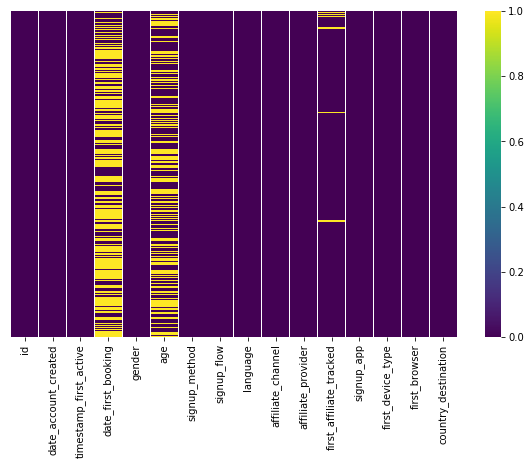

In [6]:
#Lets create a heatmap to see which all columns has null values
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis',cbar='cyan')

**Observation:** We can see there are few columns will null values

Let us now get details of these columns.

In [7]:
#Columns with null values in the Train dataFrame
var_with_na=[var for var in train.columns if train[var].isnull().sum()>=1 ]

for var in var_with_na:
    print(var, np.round(train[var].isnull().mean(),3), '% missing values')

date_first_booking 0.583 % missing values
age 0.412 % missing values
first_affiliate_tracked 0.028 % missing values


In [8]:
#Columns with null values in the Test dataFrame
var_with_na2=[var for var in test.columns if test[var].isnull().sum()>=1 ]

for var in var_with_na2:
    print(var, np.round(test[var].isnull().mean(),3), '% missing values')

date_first_booking 1.0 % missing values
age 0.465 % missing values
first_affiliate_tracked 0.0 % missing values


In [9]:
country=pd.read_csv('../input/countries.csv')
country.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [10]:
test_ids = test['id']
Nrows_train = train.shape[0]  

# Store country names
labels = train['country_destination'].values
train1 = train.drop(['country_destination'], axis=1)

# Combining the test and train data. If this is not done, the number of dummy variable columns do not match in test and train data.
# Some items present in train data and are not present in test data. For example, browser type. 
data_all = pd.concat((train1,test), axis = 0, ignore_index = True)

# Dropping ids which are saved separately and date of first booking which is completely absent in the test data
data_all = data_all.drop(['id','date_first_booking'], axis=1)

In [11]:
#Columns with null values in the Test dataFrame
var_with_na3=[var for var in data_all.columns if data_all[var].isnull().sum()>=1 ]

for var in var_with_na3:
    print(var, np.round(data_all[var].isnull().mean(),3), '% missing values')

age 0.424 % missing values
first_affiliate_tracked 0.022 % missing values


In [12]:
data_all.gender.replace('-unknown-', np.nan, inplace=True)
data_all.first_browser.replace('-unknown-', np.nan, inplace=True)

In [13]:
data_all.loc[data_all.age > 100, 'age'] = np.nan
data_all.loc[data_all.age < 18, 'age'] = np.nan

In [14]:
# Splitting date time data for date account created
data_all['dac_year'] = data_all.date_account_created.dt.year
data_all['dac_month'] = data_all.date_account_created.dt.month
data_all['dac_day'] = data_all.date_account_created.dt.day

# Splitting date time data for time first active
data_all['tfa_year'] = data_all.timestamp_first_active.dt.year
data_all['tfa_month'] = data_all.timestamp_first_active.dt.month
data_all['tfa_day'] = data_all.timestamp_first_active.dt.day

data_all.drop('date_account_created',1, inplace=True)
data_all.drop('timestamp_first_active',1, inplace=True)

In [15]:
data_all.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
0,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,2009,3,19
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2009,5,23
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,2009,6,9
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,2009,10,31
4,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,2009,12,8


In [16]:
data_all.groupby('gender').age.agg(['min','max','mean','count'])

,min,max,mean,count
gender,,,,
FEMALE,18.0,100.0,35.742783,70738
MALE,18.0,100.0,36.293932,63399
OTHER,18.0,78.0,35.945455,275


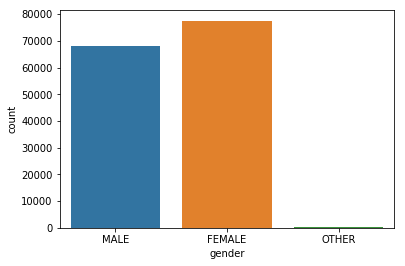

In [17]:
sns.countplot(data_all['gender'])

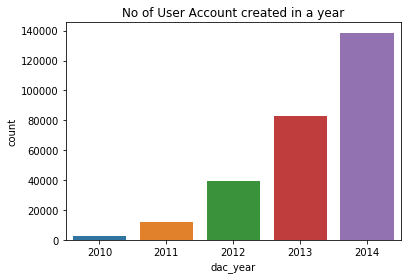

In [18]:
plt.title('No of User Account created in a year')
sns.countplot(data_all['dac_year'])

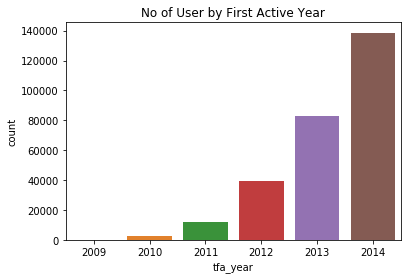

In [19]:
plt.title('No of User by First Active Year')
sns.countplot(data_all['tfa_year'])

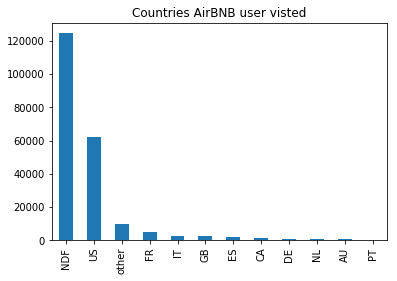

In [20]:
plt.title('Countries AirBNB user visted')
train['country_destination'].value_counts().plot(kind='bar')

In [21]:
data_all.language.value_counts()

en           265538
zh             2634
fr             1508
es             1174
ko             1116
de              977
it              633
ru              508
ja              345
pt              322
sv              176
nl              134
tr               92
da               75
pl               75
no               51
cs               49
el               30
th               28
hu               25
id               23
fi               20
ca                6
is                5
hr                2
-unknown-         1
Name: language, dtype: int64

In [22]:
data_all.isnull().sum()

gender                     129480
age                        119744
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser               44394
dac_year                        0
dac_month                       0
dac_day                         0
tfa_year                        0
tfa_month                       0
tfa_day                         0
dtype: int64

In [23]:
features = ['gender','signup_method','signup_flow','language','affiliate_channel','affiliate_provider',\
            'first_affiliate_tracked','signup_app','first_device_type','first_browser']

# get dummies
data_all = pd.get_dummies(data_all,columns=features)

In [24]:
data_all.describe()

,age,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,gender_FEMALE,gender_MALE,gender_OTHER,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
count,155803.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,...,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000
mean,36.071186,2013.243828,6.457505,15.958969,2013.243341,6.457446,15.958845,0.281346,0.247540,0.001212,...,0.000624,0.000098,0.000007,0.000156,0.000004,0.000029,0.000007,0.000004,0.000051,0.000025
std,11.654972,0.921206,2.985339,8.757489,0.921756,2.985189,8.757084,0.449657,0.431584,0.034795,...,0.024976,0.009898,0.002694,0.012491,0.001905,0.005388,0.002694,0.001905,0.007128,0.005040
min,18.000000,2010.000000,1.000000,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,2013.000000,4.000000,8.000000,2013.000000,4.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,2014.000000,7.000000,16.000000,2014.000000,7.000000,16.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,2014.000000,9.000000,23.000000,2014.000000,9.000000,23.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data_all.head()

,age,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day,gender_FEMALE,gender_MALE,gender_OTHER,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,NaN,2010,6,28,2009,3,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,2011,5,25,2009,5,23,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,56.0,2010,9,28,2009,6,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,2011,12,5,2009,10,31,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.0,2010,9,14,2009,12,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Splitting train and test for the classifier
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder

V = data_all.values
X_train = V[:Nrows_train]
X_test = V[Nrows_train:]

#Create labels
labler = LabelEncoder()
y = labler.fit_transform(labels)

# Implementation of the classifier (decision tree)
xgb = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=22,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=0)               
xgb.fit(X_train, y)
y_pred = xgb.predict_proba(X_test) 

In [27]:
#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(test_ids)):
    idx = test_ids[i]
    ids += [idx] * 5
    cts += labler.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

#Generate submission
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('submission.csv',index=False)